In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [222]:
# Fetching data from S3

In [223]:
from s3fs.core import S3FileSystem
# set the config file to an ini in the same path
# ini file contains aws keys.
# https://boto3.readthedocs.io/en/latest/guide/quickstart.html
import os
os.environ['AWS_CONFIG_FILE'] = 'aws_config.ini'

s3 = S3FileSystem(anon=False)
key = 'application_record.csv'
bucket = '18-09-test'
application_record = pd.read_csv(s3.open('{}/{}'.format(bucket, key),mode='rb'))
key1 = 'credit_record.csv'
credit_record = pd.read_csv(s3.open('{}/{}'.format(bucket, key1),mode='rb'))

### EDA for Application Record

In [224]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [225]:
application_record.shape

(438557, 18)

In [226]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [227]:
#Checking for duplicate records

In [228]:
application_record[application_record.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


#### 1) What is the proportion of females in the applicant customer base?

In [229]:
gender_val = application_record.CODE_GENDER.value_counts(normalize = True)
gender_val

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

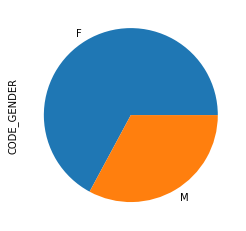

In [230]:
gender_val.plot.pie()
plt.show()

In [231]:
# Female Proportion is around 67.14%

In [232]:
housing_val = application_record.NAME_HOUSING_TYPE.value_counts(normalize = True)
housing_val

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

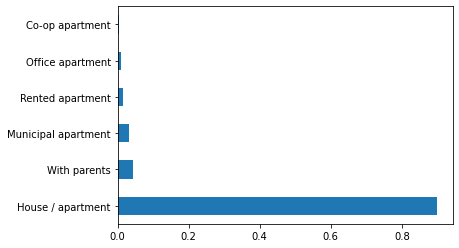

In [233]:
housing_val.plot.barh()
plt.show()

#### 2) Is homeownership higher among male applicants or female applicants? 

In [234]:
housing_ownership_count = application_record.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [235]:
housing_ownership_percent = housing_ownership_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

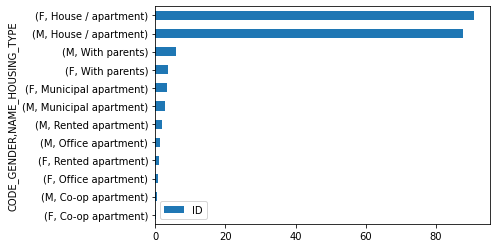

In [236]:
housing_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.show()

In [237]:
# Female ownership percentage is 90.886 and Male is 87.584. So female applicants have higher houseownership percentage

#### 3) Is there any correlation between the customer's income level and education level?

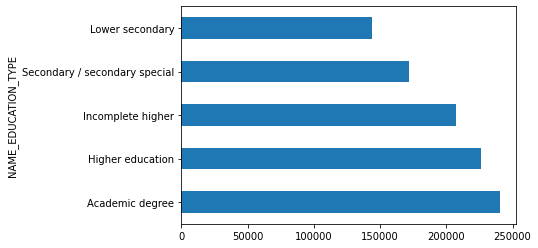

In [238]:
application_record.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

In [239]:
# Income level is increasing with the education level

#### 4) What is the average and median salary of the applicant base? 

In [240]:
print(application_record.AMT_INCOME_TOTAL.mean())
print(application_record.AMT_INCOME_TOTAL.median())

187524.2860095039
160780.5


In [241]:
# Average salary of the applicant base is 187524.286 and median salary is 160780.5

### EDA for Credit Record

In [242]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [243]:
credit_record.shape

(1048575, 3)

In [244]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [245]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


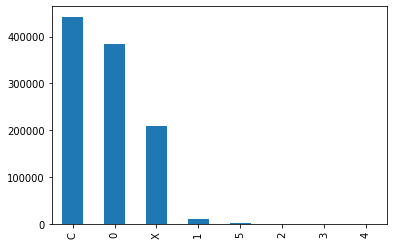

In [247]:
credit_record.STATUS.value_counts().plot.bar()
plt.show()

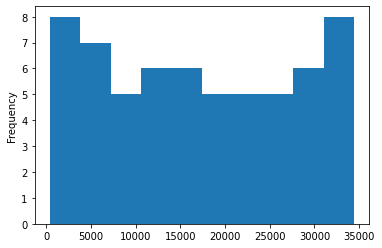

In [248]:
credit_record.MONTHS_BALANCE.value_counts().plot.hist()
plt.show()

In [250]:
# how long (in months) each customer having card

In [251]:
credit_record['MONTHS_BALANCE'] = credit_record.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_record.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'},inplace = True)
cardholder_tenure.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [252]:
credit_record['STATUS'][credit_record["STATUS"] == 'C'] = -1
credit_record['STATUS'][credit_record["STATUS"] == 'X'] = -1
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [253]:
credit_record['STATUS'] = credit_record.STATUS.apply(lambda x : int(x))

In [254]:
credit_record.sort_values(by = 'STATUS',ascending = False,inplace = True)
credit_record.drop_duplicates(subset = ['ID'],inplace = True)
credit_record.shape

(45985, 3)

In [255]:
# Assuming that a person is consider a defaulter to bank if he has a payment withstanding for more than 60 days. So all the customers having STATUS >= 2 will be considered as defaulters or bad customers

In [256]:
credit_record['target'] = credit_record.STATUS.apply(lambda x : 0 if x>=2 else 1)
credit_record.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
credit_record.head()

,ID,target
372050,5042064,0
307952,5029028,0
723708,5097065,0
942335,5135344,0
832456,5117313,0


In [258]:
credit_record.target.value_counts()

1    45318
0      667
Name: target, dtype: int64

In [36]:
# Merging application_records & credit_record to get the number of months for which the customer having a card.

In [259]:
cust_data = pd.merge(application_record,cardholder_tenure,on = 'ID',how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [260]:
# Merging Credit & Application Record

In [261]:
cust_data = pd.merge(cust_data, credit_record, on = "ID", how = "inner")
cust_data.shape

(36457, 20)

In [262]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [263]:
cust_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'],
      dtype='object')

In [264]:
#Dropping duplicate values

In [265]:
cust_data.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'],inplace = True)
cust_data.shape

(32177, 20)

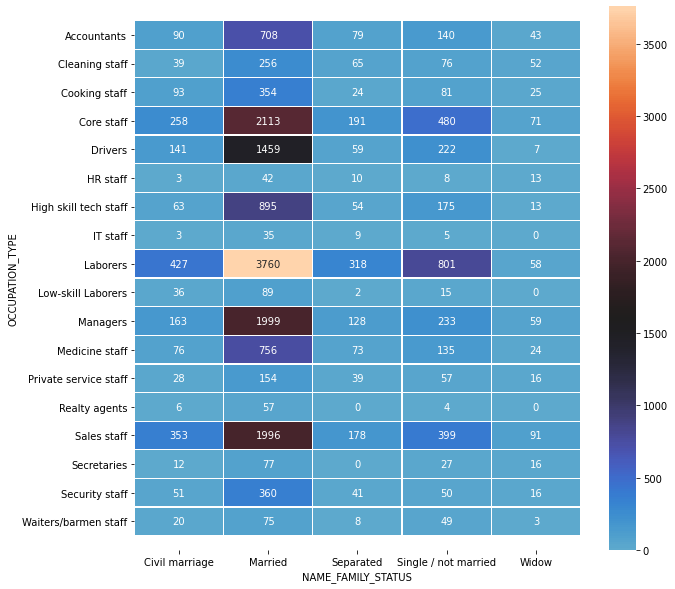

In [266]:
pvt_tbl = pd.pivot_table(data = cust_data, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

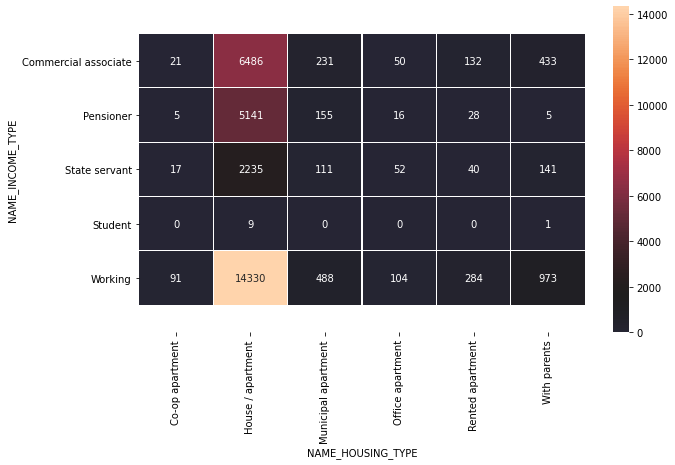

In [267]:
pvt_tbl = pd.pivot_table(data = cust_data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [268]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   32177 non-null  int64  
 1   CODE_GENDER          32177 non-null  object 
 2   FLAG_OWN_CAR         32177 non-null  object 
 3   FLAG_OWN_REALTY      32177 non-null  object 
 4   CNT_CHILDREN         32177 non-null  int64  
 5   AMT_INCOME_TOTAL     32177 non-null  float64
 6   NAME_INCOME_TYPE     32177 non-null  object 
 7   NAME_EDUCATION_TYPE  32177 non-null  object 
 8   NAME_FAMILY_STATUS   32177 non-null  object 
 9   NAME_HOUSING_TYPE    32177 non-null  object 
 10  DAYS_BIRTH           32177 non-null  int64  
 11  DAYS_EMPLOYED        32177 non-null  int64  
 12  FLAG_MOBIL           32177 non-null  int64  
 13  FLAG_WORK_PHONE      32177 non-null  int64  
 14  FLAG_PHONE           32177 non-null  int64  
 15  FLAG_EMAIL           32177 non-null 

In [269]:
cust_data.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        9980
CNT_FAM_MEMBERS           0
CUST_FOR_MONTHS           0
target                    0
dtype: int64

In [270]:
# Converting binary categorical columns to have integer value

In [271]:
cust_data['CODE_GENDER'] = cust_data.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
cust_data['FLAG_OWN_CAR'] = cust_data.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
cust_data['FLAG_OWN_REALTY'] = cust_data.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [272]:
cust_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
count,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.0,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.669267,0.378842,0.671194,0.431395,1.858457e+05,-15976.384871,59795.907387,1.0,0.225285,0.295180,0.089971,2.199521,26.070268,0.981415
std,4.181678e+04,0.470484,0.485106,0.469787,0.745757,1.007217e+05,4214.213798,138116.549593,0.0,0.417776,0.456131,0.286145,0.914533,16.465296,0.135055
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.041913e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19457.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000
50%,5.074710e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,-15565.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12454.000000,-401.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000


In [273]:
cust_data.FLAG_MOBIL.value_counts()

1    32177
Name: FLAG_MOBIL, dtype: int64

In [274]:
# Since all the rows have FLAG_MOBIL as 1 so there is no variation available for this column and hence it would not add any value to the model.Hence it is dropped

In [275]:
cust_data.drop('FLAG_MOBIL', axis = 1, inplace = True)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26,1


In [276]:
# CNT_FAM_MEMBERS cannot be float. Converting the column to int type.

In [277]:
cust_data['CNT_FAM_MEMBERS'] = cust_data['CNT_FAM_MEMBERS'].astype('int')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,1


In [278]:
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()

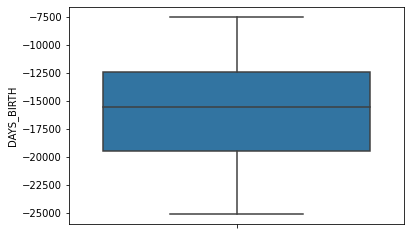

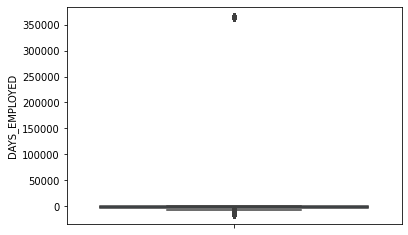

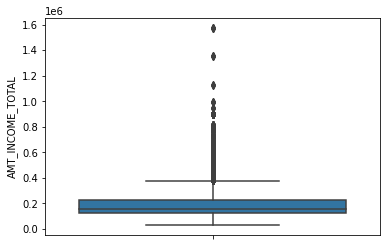

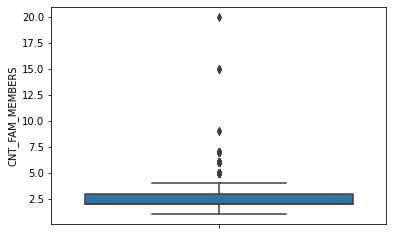

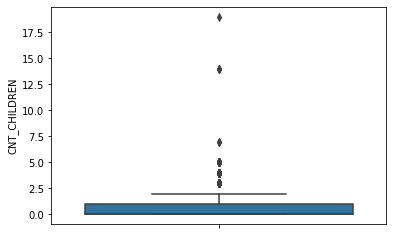

In [279]:
boxplt_col = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]
for col in boxplt_col :
    box_plot(cust_data,col)

In [280]:
# Checking outliers for DAYS_EMPLOYED column

In [281]:
cust_data[cust_data['DAYS_EMPLOYED'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
7,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,1
8,5008813,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,1
9,5008814,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,1
69,5008884,1,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,1
150,5008974,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,1,0,0,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21244,365243,0,0,0,NaN,2,28,0
36418,5139446,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21256,365243,0,1,0,NaN,1,16,0
36432,5145690,1,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,0,0,0,NaN,2,17,0
36434,5145817,1,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22011,365243,0,0,0,NaN,2,39,0


In [282]:
# Checking for Pensioner Income type

In [283]:
cust_data[(cust_data['DAYS_EMPLOYED'] > 0) & (cust_data.NAME_INCOME_TYPE == 'Pensioner')].shape

(5461, 19)

In [284]:
# Converting the Days_Birth and Days_Employed to positive integers

In [285]:
def convert_to_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df

In [286]:
continuous_variable = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in continuous_variable :
    cust_data = convert_to_positive(cust_data,c)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,1


In [287]:
# Converting DAYS to YEARS

In [288]:
cust_data['EMP_YEARS'] = cust_data.DAYS_EMPLOYED/365
cust_data['AGE'] = cust_data.DAYS_BIRTH/365
cust_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,1,12.443836,32.890411
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,1,12.443836,32.890411
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,1,3.106849,58.832877
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,1,8.358904,52.356164
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164


In [289]:
cust_data['EMP_YEARS'] = cust_data.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

#### 5) Is the proportion of bad customers higher for people who own cars?

In [290]:
def bad_cust_proportion(col) :
    bad_prop_cnt = cust_data.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [291]:
bad_cust_proportion('FLAG_OWN_CAR')

ID
FLAG_OWN_CAR target           
0            0        1.926252
             1       98.073748
1            0        1.747334
             1       98.252666

In [292]:
# Proportion of bad customers for people who own a car is less than those who don't own a car

#### 6) Is the proportion of bad customers higher for those living on rent than the rest of the population?

In [293]:
bad_cust_proportion('NAME_HOUSING_TYPE')

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0        2.189781
                    1       97.810219
House / apartment   0        1.817359
                    1       98.182641
Municipal apartment 0        2.955665
                    1       97.044335
Office apartment    0        3.896104
                    1       96.103896
Rented apartment    0        1.626016
                    1       98.373984
With parents        0        1.646612
                    1       98.353388

In [294]:
# People living on rent don't have the highest proportion of bad customers whereas People having 'Office apartment' have the highest proportion of bad customers

#### 7) Is the proportion of bad customers higher for those who are single than married customers?

In [295]:
bad_cust_proportion('NAME_FAMILY_STATUS')

ID
NAME_FAMILY_STATUS   target           
Civil marriage       0        1.717557
                     1       98.282443
Married              0        1.720625
                     1       98.279375
Separated            0        1.615509
                     1       98.384491
Single / not married 0        2.327221
                     1       97.672779
Widow                0        3.232917
                     1       96.767083

In [296]:
# Single customers have higher proportion of bad customers as compared to the married customers

In [297]:
cust_data['OCCUPATION_TYPE'] = cust_data.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
cust_data.OCCUPATION_TYPE.value_counts()

UNEMPLOYED               9980
Laborers                 5460
Core staff               3185
Sales staff              3062
Managers                 2629
Drivers                  1931
High skill tech staff    1229
Accountants              1082
Medicine staff           1074
Cooking staff             586
Security staff            530
Cleaning staff            493
Private service staff     296
Waiters/barmen staff      157
Low-skill Laborers        150
Secretaries               134
HR staff                   77
Realty agents              67
IT staff                   55
Name: OCCUPATION_TYPE, dtype: int64

### Calculating WOE & IV

In [298]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = cust_data[col].unique()
    df.set_index('values',inplace = True)
    
    values = cust_data[col].unique()
    total_dict = dict(cust_data.groupby(col).size())
    col_target_dict = dict(cust_data.groupby([col,'target']).size())
    target_count = dict(cust_data.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df    

In [299]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [300]:
iv_values['col_name'] = cust_data.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['ID','target'],inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


### Binary Variable

In [301]:
# CODE_GENDER

In [302]:
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.0115884
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,10642,10414,228,0.978575,0.0214245,0.329776,0.381271,-0.145096,0.0074717
1,21535,21165,370,0.982819,0.0171813,0.670224,0.618729,0.079944,0.00411671


In [303]:
# FLAG_OWN_CAR

In [304]:
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.00229239
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12190,11977,213,0.982527,0.0174733,0.379271,0.356187,0.062794,0.00144953
0,19987,19602,385,0.980737,0.0192625,0.620729,0.643813,-0.036513,0.000842864


In [305]:
# FLAG_OWN_REALTY

In [306]:
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.0304867
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21597,21245,352,0.983701,0.0162986,0.672757,0.588629,0.133589,0.0112386
0,10580,10334,246,0.976749,0.0232514,0.327243,0.411371,-0.228794,0.0192481


In [307]:
# FLAG_WORK_PHONE

In [308]:
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.00205838
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7249,7103,146,0.979859,0.0201407,0.224928,0.244147,-0.081991,0.0015758
0,24928,24476,452,0.981868,0.0181322,0.775072,0.755853,0.025109,0.00048258


In [309]:
# FLAG_PHONE

In [310]:
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.000168305
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22679,22261,418,0.981569,0.0184311,0.70493,0.698997,0.008453,5.01602e-05
1,9498,9318,180,0.981049,0.0189514,0.29507,0.301003,-0.019910,0.000118145


In [311]:
# FLAG_EMAIL

In [312]:
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.000529595
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29282,28734,548,0.981285,0.0187146,0.909908,0.916388,-0.007096,4.5977e-05
1,2895,2845,50,0.982729,0.0172712,0.0900915,0.083612,0.074638,0.000483618


### Categorical Variables

In [313]:
# NAME_INCOME_TYPE

In [314]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.0173191
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16564,16270,294,0.982251,0.0177493,0.515216,0.491639,0.046842,0.00110438
Commercial associate,7492,7353,139,0.981447,0.0185531,0.232845,0.232441,0.001733,6.9859e-07
Pensioner,5478,5350,128,0.976634,0.0233662,0.169416,0.214047,-0.233835,0.0104362
State servant,2633,2596,37,0.985948,0.0140524,0.0822065,0.0618729,0.284152,0.00577784


In [315]:
# NAME_EDUCATION_TYPE

In [316]:
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.00858051
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8670,8503,167,0.980738,0.0192618,0.269261,0.279264,-0.036476,0.000364873
Secondary / secondary special,21895,21505,390,0.982188,0.0178123,0.680991,0.652174,0.043237,0.00124595
Incomplete higher,1251,1220,31,0.97522,0.0247802,0.0386333,0.0518395,-0.294038,0.00388312
Lower secondary,336,326,10,0.970238,0.0297619,0.0103233,0.0167224,-0.482345,0.00308657


In [317]:
# NAME_FAMILY_STATUS

In [318]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.0315722
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2620,2575,45,0.982824,0.0171756,0.0815415,0.0752508,0.080285,0.000505051
Married,22085,21705,380,0.982794,0.0172062,0.687324,0.635452,0.078470,0.00407041
Single / not married,4254,4155,99,0.976728,0.0232722,0.131575,0.165552,-0.229709,0.00780484
Separated,1857,1827,30,0.983845,0.0161551,0.0578549,0.0501672,0.142576,0.00109608
Widow,1361,1317,44,0.967671,0.0323292,0.0417049,0.0735786,-0.567735,0.0180958


In [319]:
# NAME_HOUSING_TYPE

In [320]:
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.0166776
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,492,484,8,0.98374,0.0162602,0.0153266,0.0133779,0.135986,0.000264999
House / apartment,28723,28201,522,0.981826,0.0181736,0.89303,0.87291,0.022788,0.000458511
Municipal apartment,1015,985,30,0.970443,0.0295567,0.0311916,0.0501672,-0.475213,0.00901745
With parents,1579,1553,26,0.983534,0.0164661,0.0491783,0.0434783,0.123190,0.000702184
Co-op apartment,137,134,3,0.978102,0.0218978,0.00424333,0.00501672,-0.167429,0.000129489
Office apartment,231,222,9,0.961039,0.038961,0.00702999,0.0150502,-0.761204,0.00610499


In [321]:
# OCCUPATION_TYPE

In [322]:
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.0533465
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
UNEMPLOYED,9980,9790,190,0.980962,0.0190381,0.310016,0.317726,-0.024564,0.00018938
Security staff,530,518,12,0.977358,0.0226415,0.0164033,0.0200669,-0.201588,0.000738536
Sales staff,3062,3017,45,0.985304,0.0146963,0.0955382,0.0752508,0.238699,0.00484256
Accountants,1082,1060,22,0.979667,0.0203327,0.0335666,0.0367893,-0.091675,0.00029544
Laborers,5460,5364,96,0.982418,0.0175824,0.16986,0.160535,0.056460,0.000526469
Managers,2629,2582,47,0.982122,0.0178775,0.0817632,0.0785953,0.039515,0.000125179
Drivers,1931,1888,43,0.977732,0.0222683,0.0597866,0.0719064,-0.184584,0.00223711
Core staff,3185,3113,72,0.977394,0.022606,0.0985782,0.120401,-0.199981,0.00436422
High skill tech staff,1229,1200,29,0.976404,0.0235964,0.0379999,0.048495,-0.243876,0.00255949


### Continuous Variables

In [323]:
cust_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
count,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.669267,0.378842,0.671194,0.431395,1.858457e+05,0.225285,0.295180,0.089971,2.199521,26.070268,0.981415,5.836369,43.770917
std,4.181678e+04,0.470484,0.485106,0.469787,0.745757,1.007217e+05,0.417776,0.456131,0.286145,0.914533,16.465296,0.135055,6.651120,11.545791
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,20.517808
25%,5.041913e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,1.098630,34.120548
50%,5.074710e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000,4.216438,42.643836
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000,8.605479,53.306849
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000,43.049315,68.909589


In [324]:
# CNT_CHILDREN

In [325]:
cust_data['cnt_child_category'] = cust_data.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [326]:
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.000711572
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22233,21813,420,0.981109,0.0188908,0.690744,0.702341,-0.016650,0.000193097
1,6609,6492,117,0.982297,0.0177031,0.20558,0.195652,0.049495,0.000491362
1+,3335,3274,61,0.981709,0.0182909,0.103676,0.102007,0.016237,2.71127e-05


In [327]:
# AMT_INCOME_TOTAL

In [328]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
cust_data['income_bin'] = pd.cut(cust_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,29,1,3.106849,58.832877,0,150000
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,4,1,8.358904,52.356164,0,300000
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,26,1,8.358904,52.356164,0,300000


In [329]:
cust_data.income_bin.value_counts()

150000     9059
200000     6832
250000     6019
100000     3113
300000     2407
1600000    2028
70000      1411
350000     1308
Name: income_bin, dtype: int64

In [330]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.0102759
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
100000,3113,3045,68,0.978156,0.0218439,0.0964248,0.113712,-0.164908,0.00285086
350000,1308,1281,27,0.979358,0.0206422,0.0405649,0.0451505,-0.107097,0.000491103
300000,2407,2358,49,0.979643,0.0203573,0.0746699,0.0819398,-0.092908,0.000675435
250000,6019,5904,115,0.980894,0.0191062,0.18696,0.192308,-0.028204,0.000150833
150000,9059,8890,169,0.981345,0.0186555,0.281516,0.282609,-0.003873,4.23152e-06
200000,6832,6715,117,0.982875,0.0171253,0.212641,0.195652,0.083268,0.00141466
1600000,2028,1994,34,0.983235,0.0167653,0.0631432,0.0568562,0.104881,0.000659388
70000,1411,1392,19,0.986534,0.0134656,0.0440799,0.0317726,0.327401,0.00402944


In [331]:
# CNT_FAM_MEMBERS

In [332]:
cust_data.CNT_FAM_MEMBERS.value_counts()

2     17166
1      6168
3      5665
4      2748
5       357
6        50
7        17
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [333]:
cust_data['cnt_family_bin'] = cust_data.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [334]:
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.00803882
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,6168,6032,136,0.977951,0.0220493,0.191013,0.227425,-0.174478,0.00635304
3,5665,5564,101,0.982171,0.0178288,0.176193,0.168896,0.042295,0.000308616
2,17166,16861,305,0.982232,0.0177677,0.533931,0.510033,0.045790,0.00109426
3+,3178,3122,56,0.982379,0.0176211,0.0988632,0.0936455,0.054221,0.000282906


In [335]:
# CUST_FOR_MONTHS

In [336]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
cust_data['months_bin'] = pd.cut(cust_data['CUST_FOR_MONTHS'], bins = bins,labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000,2,1.5
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000,2,1.5
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,29,1,3.106849,58.832877,0,150000,2,2.5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,4,1,8.358904,52.356164,0,300000,1,0.5
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,26,1,8.358904,52.356164,0,300000,1,2.5


In [337]:
cust_data.months_bin.value_counts()

1      4279
0.5    4200
1.5    4096
2      3639
2.5    3453
3.5    3079
3      3049
4      2433
4.5    2214
5      1735
Name: months_bin, dtype: int64

In [338]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE',inplace = True)
CUST_FOR_MONTHS_df

iv_value    0.290192
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,1735,1669,66,0.96196,0.0380403,0.0528516,0.110368,-0.736332,0.0423511
3.5,3079,2990,89,0.971095,0.0289055,0.0946832,0.148829,-0.452265,0.0244884
4,2433,2364,69,0.97164,0.02836,0.0748599,0.115385,-0.432653,0.0175332
4.5,2214,2154,60,0.9729,0.0271003,0.0682099,0.100334,-0.385920,0.0123975
3,3049,2989,60,0.980321,0.0196786,0.0946515,0.100334,-0.058307,0.000331357
2.5,3453,3387,66,0.980886,0.0191138,0.107255,0.110368,-0.028612,8.90705e-05
2,3639,3584,55,0.984886,0.015114,0.113493,0.0919732,0.210245,0.00452445
1.5,4096,4037,59,0.985596,0.0144043,0.127838,0.0986622,0.259063,0.00755839
1,4279,4221,58,0.986445,0.0135546,0.133665,0.09699,0.320727,0.0117626


In [339]:
# EMP_YEARS

In [340]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
cust_data['emp_years_bin'] = pd.cut(cust_data['EMP_YEARS'], bins = bins, labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,15,1,12.443836,32.890411,0,1600000,2,1.5,15
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,14,1,12.443836,32.890411,0,1600000,2,1.5,15
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,29,1,3.106849,58.832877,0,150000,2,2.5,5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,4,1,8.358904,52.356164,0,300000,1,0.5,10
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,26,1,8.358904,52.356164,0,300000,1,2.5,10


In [341]:
cust_data.emp_years_bin.value_counts()

5          12599
10          7866
retired     5461
15          3271
20+         1531
20          1449
Name: emp_years_bin, dtype: int64

In [342]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

iv_value    0.0376717
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,12599,12324,275,0.978173,0.0218271,0.390259,0.459866,-0.164124,0.0114242
retired,5461,5350,111,0.979674,0.0203259,0.169416,0.185619,-0.091335,0.00147984
15,3271,3216,55,0.983186,0.0168144,0.10184,0.0919732,0.101904,0.00100544
10,7866,7744,122,0.98449,0.0155098,0.245226,0.204013,0.183996,0.00758299
20+,1531,1513,18,0.988243,0.011757,0.0479116,0.0301003,0.464821,0.00827905
20,1449,1432,17,0.988268,0.0117322,0.0453466,0.0284281,0.466957,0.00790021


In [343]:
# AGE

In [344]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
cust_data['age_bin'] = pd.cut(cust_data['AGE'], bins = bins,labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,12.443836,32.890411,0,1600000,2,1.5,15,35
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,12.443836,32.890411,0,1600000,2,1.5,15,35
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,3.106849,58.832877,0,150000,2,2.5,5,62
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,8.358904,52.356164,0,300000,1,0.5,10,55
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,8.358904,52.356164,0,300000,1,2.5,10,55


In [345]:
cust_data.age_bin.value_counts()

40    4720
62    4622
35    4481
45    4472
50    3689
55    3591
30    2803
70    2214
27    1585
Name: age_bin, dtype: int64

In [346]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE',inplace = True)
AGE_df

iv_value    0.0189073
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
55,3591,3508,83,0.976887,0.0231133,0.111086,0.138796,-0.222696,0.0061708
35,4481,4387,94,0.979023,0.0209775,0.138921,0.157191,-0.123551,0.00225717
30,2803,2745,58,0.979308,0.0206921,0.0869249,0.09699,-0.109564,0.00110277
27,1585,1554,31,0.980442,0.0195584,0.0492099,0.0518395,-0.052057,0.000136885
70,2214,2172,42,0.98103,0.0189702,0.0687799,0.0702341,-0.020923,3.04265e-05
50,3689,3622,67,0.981838,0.0181621,0.114696,0.11204,0.023432,6.22438e-05
62,4622,4543,79,0.982908,0.0170922,0.143861,0.132107,0.085238,0.00100192
45,4472,4400,72,0.9839,0.0161002,0.139333,0.120401,0.146037,0.00276473
40,4720,4648,72,0.984746,0.0152542,0.147186,0.120401,0.200869,0.0053803


In [347]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.290192
OCCUPATION_TYPE,0.0533465
EMP_YEARS,0.0376717
NAME_FAMILY_STATUS,0.0315722
FLAG_OWN_REALTY,0.0304867
AGE,0.0189073
NAME_INCOME_TYPE,0.0173191
NAME_HOUSING_TYPE,0.0166776
CODE_GENDER,0.0115884


In [348]:
cust_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CUST_FOR_MONTHS', 'target', 'EMP_YEARS', 'AGE', 'cnt_child_category',
       'income_bin', 'cnt_family_bin', 'months_bin', 'emp_years_bin',
       'age_bin'],
      dtype='object')

### Data preparation for Model training

In [349]:
cust_data_train = cust_data[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                             'OCCUPATION_TYPE', 'CUST_FOR_MONTHS', 'income_bin', 'cnt_family_bin',
                             'months_bin', 'emp_years_bin', 'age_bin', 'target']]

In [350]:
# Dummy features for categorical values

In [351]:
def creatingDummyVariables(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [352]:
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                      'OCCUPATION_TYPE', 'income_bin', 'cnt_family_bin', 'months_bin',
                      'emp_years_bin', 'age_bin'])

In [353]:
cust_data_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CUST_FOR_MONTHS,target,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,emp_years_bin_20,emp_years_bin_20+,age_bin_30,age_bin_35,age_bin_40,age_bin_45,age_bin_50,age_bin_55,age_bin_62,age_bin_70
0,0,1,1,1,0,0,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,1,0,0,14,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,29,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,1,1,26,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model building

In [354]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

#### Logistic regression model 

In [355]:
def logisticReg (df) :
    X = df.drop(['target'], axis=1)
    y = df['target']
    
    # Splitting the data into train and test
    #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2018) 
    
    logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
    res = logm1.fit()
    return res

In [356]:
res = logisticReg(cust_data_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22523
Model:                            GLM   Df Residuals:                    22448
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.8
Date:                Wed, 06 Jan 2021   Deviance:                       3761.7
Time:                        15:42:58   Pearson chi2:                 2.35e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                54.5563   4.69e+04      0.001      0.999   -9.18e+04     9.2e+04
CODE_GENDER                                           0.4008      0.137      2.926      0.003       0.132       0.669
FLAG_OWN_CAR                                          0.4122      0.122      3.388      0.001       0.174       0.651
FLAG_OWN_REALTY                                       0.3192      0.110      2.912      0.004       0.104       0.534
FLAG_WORK_PHONE                                      -0.0816      0.136     -0.602      0.547      -0.348       0.184
FLAG_PHONE                                            0.0131      0.118      0.110      0.912      -0.219       0.245
FLAG_EMAIL                                           -0.0394      0.184     -0.214      0.831      -0.400       0.322
CUST_FOR_MONTHS                                      -0.0338      0.030     -1.132      0.258      -0.092       0.025
NAME_INCOME_TYPE_Pensioner                          -28.8365   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
NAME_INCOME_TYPE_State servant                        0.1740      0.229      0.761      0.447      -0.274       0.622
NAME_INCOME_TYPE_Student                             20.9185   5.31e+04      0.000      1.000   -1.04e+05    1.04e+05
NAME_INCOME_TYPE_Working                              0.1236      0.130      0.954      0.340      -0.130       0.377
NAME_EDUCATION_TYPE_Higher education                -20.3697   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Incomplete higher               -20.6313   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Lower secondary                 -20.4825   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Secondary / secondary special   -20.3242   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_FAMILY_STATUS_Married                            0.1549      0.189      0.819      0.413      -0.216       0.525
NAME_FAMILY_STATUS_Separated                         -0.5173      0.302     -1.711      0.087      -1.110       0.075
NAME_FAMILY_STATUS_Single / not married              -0.9065      0.282     -3.214      0.001      -1.459      -0.354
NAME_FAMILY_STATUS_Widow                             -1.2039      0.344     -3.504      0.000      -1.877      -0.530
NAME_HOUSING_TYPE_House / apartment                  -0.0273      0.731     -0.037      0.970      -1.461       1.406
NAME_HOUSING_TYPE_Municipal apartment                -0.5880      0.762     -0.772      0.440      -2.081       0.905
NAME_HOUSING_TYPE_Office apartment                   -0.8383      0.831     -1.009      0.313      -2.466       0.790
NAME_HOUSING_TY

In [357]:
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.290192
OCCUPATION_TYPE,0.0533465
EMP_YEARS,0.0376717
NAME_FAMILY_STATUS,0.0315722
FLAG_OWN_REALTY,0.0304867
AGE,0.0189073
NAME_INCOME_TYPE,0.0173191
NAME_HOUSING_TYPE,0.0166776
CODE_GENDER,0.0115884


In [358]:
# Doing feature selection based on IV values

In [359]:
#Removing all the columns with IV_value < 0.002

In [360]:
cust_data_train = cust_data[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE','OCCUPATION_TYPE',
                             'CUST_FOR_MONTHS', 'income_bin', 'cnt_family_bin', 'months_bin', 'emp_years_bin', 'age_bin',
                             'target']]

In [361]:
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                            'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'income_bin', 'cnt_family_bin',
                            'months_bin', 'emp_years_bin', 'age_bin'])
                                                           

In [362]:
res = logisticReg(cust_data_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22523
Model:                            GLM   Df Residuals:                    22450
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.9
Date:                Wed, 06 Jan 2021   Deviance:                       3761.7
Time:                        15:43:32   Pearson chi2:                 2.35e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                54.5670   4.69e+04      0.001      0.999   -9.19e+04     9.2e+04
CODE_GENDER                                           0.3999      0.137      2.922      0.003       0.132       0.668
FLAG_OWN_CAR                                          0.4116      0.122      3.385      0.001       0.173       0.650
FLAG_OWN_REALTY                                       0.3180      0.109      2.905      0.004       0.103       0.533
FLAG_WORK_PHONE                                      -0.0759      0.129     -0.587      0.557      -0.329       0.178
CUST_FOR_MONTHS                                      -0.0339      0.030     -1.134      0.257      -0.092       0.025
NAME_INCOME_TYPE_Pensioner                          -28.8392   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
NAME_INCOME_TYPE_State servant                        0.1750      0.228      0.766      0.444      -0.273       0.623
NAME_INCOME_TYPE_Student                             20.8927   5.31e+04      0.000      1.000   -1.04e+05    1.04e+05
NAME_INCOME_TYPE_Working                              0.1238      0.130      0.956      0.339      -0.130       0.378
NAME_EDUCATION_TYPE_Higher education                -20.3778   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Incomplete higher               -20.6372   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Lower secondary                 -20.4900   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Secondary / secondary special   -20.3312   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_FAMILY_STATUS_Married                            0.1556      0.189      0.823      0.410      -0.215       0.526
NAME_FAMILY_STATUS_Separated                         -0.5149      0.302     -1.705      0.088      -1.107       0.077
NAME_FAMILY_STATUS_Single / not married              -0.9051      0.282     -3.210      0.001      -1.458      -0.352
NAME_FAMILY_STATUS_Widow                             -1.2031      0.344     -3.501      0.000      -1.877      -0.529
NAME_HOUSING_TYPE_House / apartment                  -0.0289      0.731     -0.040      0.968      -1.461       1.404
NAME_HOUSING_TYPE_Municipal apartment                -0.5898      0.761     -0.775      0.439      -2.082       0.902
NAME_HOUSING_TYPE_Office apartment                   -0.8389      0.830     -1.010      0.312      -2.466       0.789
NAME_HOUSING_TYPE_Rented apartment                    0.1462      0.838      0.174      0.862      -1.497       1.789
NAME_HOUSING_TYPE_With parents                        0.2491      0.768      0.324      0.746      -1.257       1.755
OCCUPATION_TYPE

In [364]:
# feature variable to X
# Using a train-test split of 70:30 and a seed value of 2018

In [365]:
X = cust_data_train.drop(['target'], axis=1)
y = cust_data_train['target']
    
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2018)

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22523
Model:                            GLM   Df Residuals:                    22450
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.9
Date:                Wed, 06 Jan 2021   Deviance:                       3761.7
Time:                        15:44:08   Pearson chi2:                 2.35e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                54.5670   4.69e+04      0.001      0.999   -9.19e+04     9.2e+04
CODE_GENDER                                           0.3999      0.137      2.922      0.003       0.132       0.668
FLAG_OWN_CAR                                          0.4116      0.122      3.385      0.001       0.173       0.650
FLAG_OWN_REALTY                                       0.3180      0.109      2.905      0.004       0.103       0.533
FLAG_WORK_PHONE                                      -0.0759      0.129     -0.587      0.557      -0.329       0.178
CUST_FOR_MONTHS                                      -0.0339      0.030     -1.134      0.257      -0.092       0.025
NAME_INCOME_TYPE_Pensioner                          -28.8392   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
NAME_INCOME_TYPE_State servant                        0.1750      0.228      0.766      0.444      -0.273       0.623
NAME_INCOME_TYPE_Student                             20.8927   5.31e+04      0.000      1.000   -1.04e+05    1.04e+05
NAME_INCOME_TYPE_Working                              0.1238      0.130      0.956      0.339      -0.130       0.378
NAME_EDUCATION_TYPE_Higher education                -20.3778   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Incomplete higher               -20.6372   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Lower secondary                 -20.4900   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_EDUCATION_TYPE_Secondary / secondary special   -20.3312   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
NAME_FAMILY_STATUS_Married                            0.1556      0.189      0.823      0.410      -0.215       0.526
NAME_FAMILY_STATUS_Separated                         -0.5149      0.302     -1.705      0.088      -1.107       0.077
NAME_FAMILY_STATUS_Single / not married              -0.9051      0.282     -3.210      0.001      -1.458      -0.352
NAME_FAMILY_STATUS_Widow                             -1.2031      0.344     -3.501      0.000      -1.877      -0.529
NAME_HOUSING_TYPE_House / apartment                  -0.0289      0.731     -0.040      0.968      -1.461       1.404
NAME_HOUSING_TYPE_Municipal apartment                -0.5898      0.761     -0.775      0.439      -2.082       0.902
NAME_HOUSING_TYPE_Office apartment                   -0.8389      0.830     -1.010      0.312      -2.466       0.789
NAME_HOUSING_TYPE_Rented apartment                    0.1462      0.838      0.174      0.862      -1.497       1.789
NAME_HOUSING_TYPE_With parents                        0.2491      0.768      0.324      0.746      -1.257       1.755
OCCUPATION_TYPE

In [366]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'target':y_train.values, 'target_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index

y_train_pred_final.head()

,target,target_Prob,CustID
0,1,0.987367,1670
1,1,0.975226,13603
2,1,0.993580,671
3,1,0.992597,3278
4,1,0.987081,31092


## Model Evalaution

#### Plotting ROC

In [367]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [368]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.target, y_train_pred_final.target_Prob, drop_intermediate = False )

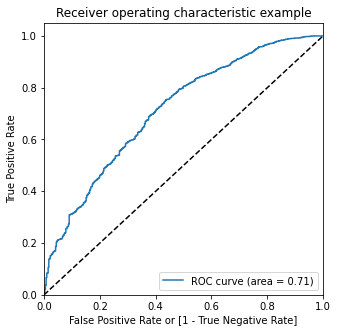

In [369]:
draw_roc(y_train_pred_final.target, y_train_pred_final.target_Prob)

In [370]:
# Run model on test data

In [371]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [372]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head(10)

,target,ID,0
0,1,27131,0.982585
1,1,12609,0.971055
2,1,30691,0.959134
3,1,28092,0.997553
4,1,11584,0.992895
5,1,8242,0.998621
6,1,17107,0.993176
7,1,10215,0.975879
8,1,15002,0.981984
9,1,7069,0.979713


In [373]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Predicted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','target','Predicted_prob'], axis=1)
y_pred_final.head()

,ID,target,Predicted_prob
0,27131,1,0.982585
1,12609,1,0.971055
2,30691,1,0.959134
3,28092,1,0.997553
4,11584,1,0.992895


In [374]:
y_pred_final['final_predicted'] = y_pred_final.Predicted_prob.map(lambda x: 1 if x > 0.8 else 0)

#### The overall accuracy

In [375]:
metrics.accuracy_score(y_pred_final.target, y_pred_final.final_predicted)

0.9810441267868241

#### Confusion Matrix

In [376]:
confusionMatrix = metrics.confusion_matrix(y_pred_final.target, y_pred_final.final_predicted )
confusionMatrix

array([[   4,  183],
       [   0, 9467]])

In [377]:
TP = confusionMatrix[1,1] # true positive 
TN = confusionMatrix[0,0] # true negatives
FP = confusionMatrix[0,1] # false positives
FN = confusionMatrix[1,0] # false negatives

#### Sensitivity and Specificity

In [378]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [379]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.0213903743315508

In [380]:
from sklearn.metrics import precision_score,recall_score

#### Precision and Recall

In [381]:
#Precision Score

In [382]:
precision = precision_score(y_pred_final.target, y_pred_final.final_predicted)
precision

0.9810362694300518

In [383]:
#Recall Score (Same as sensitivity Value)

In [384]:
recall = recall_score(y_pred_final.target, y_pred_final.final_predicted)
recall

1.0

#### F1 Score

In [385]:
#F1 Score

In [386]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9904273683109275